In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd

In [3]:
DATA_RAW_NORMAL_PATH = './data/raw/data/ds1/ds1n.csv'

In [4]:
df_n = pd.read_csv(DATA_RAW_NORMAL_PATH)

In [5]:
df_n.head()

,time,mixer_partial0.pump_P201.medium.h,mixer_partial0.pump_P201.medium.p,mixer_partial0.tank_B201.level,mixer_partial0.tank_B201.medium.h,mixer_partial0.tank_B202.level,mixer_partial0.tank_B202.medium.h,mixer_partial0.tank_B203.level,mixer_partial0.tank_B203.medium.h,mixer_partial0.tank_B204.level,...,mixer_partial0.Reservoir_filling.outerStatePort.localActive,mixer_partial0.Reservoir_filling.outerStatePort.subgraphStatePort.resume,mixer_partial0.Reservoir_filling.outerStatePort.subgraphStatePort.suspend,mixer_partial0.initialStep.outerStatePort.localActive,mixer_partial0.initialStep.outerStatePort.subgraphStatePort.resume,mixer_partial0.initialStep.outerStatePort.subgraphStatePort.suspend,mixer_partial0.stateGraphRoot.subgraphStatePort.resume,mixer_partial0.stateGraphRoot.subgraphStatePort.suspend,mixer_partial0.valve_V201.open,mixer_partial0.valve_V202.open
0,0.000000e+00,84013.058153,101325.000000,0.3000,84013.058153,0.3000,84013.058153,0.3000,84013.058153,0.100000,...,1,0,0,0,0,0,0,0,1,1
1,2.566552e-08,84013.068651,101335.479055,0.3000,84013.058153,0.3000,84013.058153,0.3000,84013.058153,0.100000,...,1,0,0,0,0,0,0,0,1,1
2,2.566552e-08,84013.068651,101335.479055,0.3000,84013.058153,0.3000,84013.058153,0.3000,84013.058153,0.100000,...,1,0,0,0,0,0,0,0,1,1
3,6.905749e-01,84025.494353,112034.101450,0.2975,84013.708954,0.2975,84013.708954,0.2975,84013.708954,0.100736,...,1,0,0,0,0,0,0,0,1,1
4,6.905749e-01,84025.494353,112034.101450,0.2975,84013.708954,0.2975,84013.708954,0.2975,84013.708954,0.100736,...,1,0,0,0,0,0,0,0,1,1


In [6]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Columns: 1266 entries, time to mixer_partial0.valve_V202.open
dtypes: float64(1008), int64(258)
memory usage: 40.9 MB


In [56]:
not 'der(mixer_partial0.tank_reservoir.level)'.startswith('der(')

False

In [105]:
[c for c in comp_ls if 'source0' in c]

[]

In [107]:
def fix_first_dot_comps(comp_name):
    for f in [c for c in comp_ls if comp_name in c]:
        comp_ls.remove(f)
        comp_ls.append(comp_name)

In [151]:
relevant_col_str_list = ["time", "v_flow", "level", "m_flow", "fluidVolume",
                       "N_in", "opening", "medium.t", "port_a.p", "port_b.p"]
# list of columns that hold one of the string in the list above
col_selection = [str(c) for c in df_n.columns if any([e in c for e in relevant_col_str_list])]
#remove those that start with "der("
col_selection = [c for c in col_selection if not c.startswith('der(')]
# remove time from list
col_selection.remove('time')
# get list of components
comp_ls = list(set(['.'.join(c.split('.')[0:2]) for c in col_selection]))
# comp_ls.remove('mixer_partial0.pipe')
def fix_first_dot_comps(comp_name):
    for f in [c for c in comp_ls if comp_name in c]:
        comp_ls.remove(f)
        comp_ls.append(comp_name)
fix_first_dot_comps('source0')
fix_first_dot_comps('source1')
fix_first_dot_comps('source2')
fix_first_dot_comps('sink0')
comp_ls = list(set(comp_ls))

# construct component signals map
comp_sigs_map = {comp:[c for c in col_selection if f'{comp}.' in c] for comp in comp_ls}
comp_ls

['mixer_partial0.valve_V204',
 'mixer_partial0.pipe3',
 'mixer_partial0.pipe_out',
 'mixer_partial0.pipe5',
 'mixer_partial0.pipe',
 'mixer_partial0.tank_B203',
 'mixer_partial0.pump_P201',
 'mixer_partial0.pipe2',
 'mixer_partial0.valve_V203',
 'mixer_partial0.valve_in1',
 'mixer_partial0.valveDiscrete',
 'mixer_partial0.valve_leaking',
 'mixer_partial0.port_out',
 'mixer_partial0.tank_B202',
 'mixer_partial0.pipe1',
 'mixer_partial0.tank_B201',
 'mixer_partial0.port_in2',
 'source1',
 'mixer_partial0.pipe4',
 'mixer_partial0.valve_clogging',
 'source0',
 'mixer_partial0.valve_V201',
 'mixer_partial0.tank_reservoir',
 'mixer_partial0.port_in1',
 'source2',
 'mixer_partial0.valve_in2',
 'mixer_partial0.valve_V202',
 'mixer_partial0.sink',
 'mixer_partial0.port_in3',
 'mixer_partial0.tank_B204',
 'sink0',
 'mixer_partial0.valve_in3']

In [152]:
len(col_selection)

154

In [153]:
len(comp_ls)

32

<Axes: >

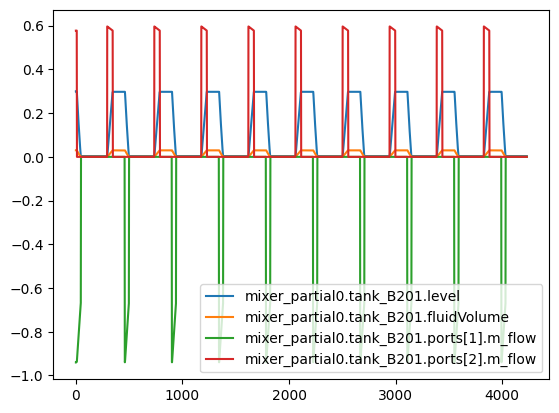

In [154]:
df_n[comp_sigs_map[list(comp_sigs_map.keys())[15]]].plot()

In [155]:
col_selection

['mixer_partial0.tank_B201.level',
 'mixer_partial0.tank_B202.level',
 'mixer_partial0.tank_B203.level',
 'mixer_partial0.tank_B204.level',
 'mixer_partial0.tank_reservoir.level',
 'mixer_partial0.pipe4.flowModel.m_flows[1]',
 'mixer_partial0.pump_P201.N_in',
 'mixer_partial0.pump_P201.fluidVolume',
 'mixer_partial0.pump_P201.m_flow',
 'mixer_partial0.pump_P201.m_flow_single',
 'mixer_partial0.valve_V201.m_flow',
 'mixer_partial0.valve_V202.m_flow',
 'mixer_partial0.valve_V203.m_flow',
 'mixer_partial0.valve_V204.m_flow',
 'mixer_partial0.valve_clogging.port_b.p',
 'mixer_partial0.valve_leaking.m_flow',
 'sink0.pipe.flowModel.m_flows[1]',
 'source0.pipe_out.flowModel.m_flows[1]',
 'source1.pipe_out.flowModel.m_flows[1]',
 'source2.pipe_out.flowModel.m_flows[1]',
 'mixer_partial0.pipe.flowModel.m_flows[1]',
 'mixer_partial0.pipe.port_a.m_flow',
 'mixer_partial0.pipe.port_a.p',
 'mixer_partial0.pipe.port_b.m_flow',
 'mixer_partial0.pipe.port_b.p',
 'mixer_partial0.pipe1.flowModel.m_flows

# DA SIND WELCHE DOPPELT!!!!!

In [156]:
comp_sigs_map['source0']

['source0.pipe_out.flowModel.m_flows[1]',
 'source0.pipe_out.port_a.m_flow',
 'source0.pipe_out.port_b.m_flow',
 'source0.pipe_out.port_b.p',
 'source0.port_out.m_flow',
 'source0.source.ports[1].m_flow',
 'source0.volumeFlowRate.port_a.m_flow',
 'source0.volumeFlowRate.port_b.m_flow']

In [157]:
len(comp_ls)

32

In [158]:
liste = []
for l in list(comp_sigs_map.values()):
    liste.extend(l)

In [159]:
len(liste)

154

In [160]:
len(set(liste))

154

In [137]:
comp_sigs_map['mixer_partial0.pipe1']

['mixer_partial0.pipe1.flowModel.m_flows[1]',
 'mixer_partial0.pipe1.port_a.m_flow',
 'mixer_partial0.pipe1.port_a.p',
 'mixer_partial0.pipe1.port_b.m_flow',
 'mixer_partial0.pipe1.port_b.p']

In [133]:
pd.Series(liste).value_counts()[0:50]

mixer_partial0.pipe2.flowModel.m_flows[1]        2
mixer_partial0.pipe2.port_b.m_flow               2
mixer_partial0.pipe2.port_a.m_flow               2
mixer_partial0.pipe2.port_b.p                    2
mixer_partial0.pipe1.port_b.p                    2
mixer_partial0.pipe1.port_b.m_flow               2
mixer_partial0.pipe1.port_a.p                    2
mixer_partial0.pipe1.port_a.m_flow               2
mixer_partial0.pipe1.flowModel.m_flows[1]        2
mixer_partial0.pipe4.port_a.m_flow               2
mixer_partial0.pipe4.port_a.p                    2
mixer_partial0.pipe4.port_b.m_flow               2
mixer_partial0.pipe4.port_b.p                    2
mixer_partial0.pipe4.flowModel.m_flows[1]        2
mixer_partial0.pipe5.port_b.m_flow               2
mixer_partial0.pipe5.port_a.p                    2
mixer_partial0.pipe5.port_a.m_flow               2
mixer_partial0.pipe5.flowModel.m_flows[1]        2
mixer_partial0.pipe_out.port_b.p                 2
mixer_partial0.pipe_out.port_b.

In [130]:
pd.Series(comp_ls).value_counts()

mixer_partial0.valve_V204        1
mixer_partial0.pipe3             1
sink0                            1
mixer_partial0.tank_B204         1
mixer_partial0.port_in3          1
mixer_partial0.sink              1
mixer_partial0.valve_V202        1
mixer_partial0.valve_in2         1
source2                          1
mixer_partial0.port_in1          1
mixer_partial0.tank_reservoir    1
mixer_partial0.valve_V201        1
source0                          1
mixer_partial0.valve_clogging    1
mixer_partial0.pipe4             1
source1                          1
mixer_partial0.port_in2          1
mixer_partial0.tank_B201         1
mixer_partial0.pipe1             1
mixer_partial0.tank_B202         1
mixer_partial0.port_out          1
mixer_partial0.valve_leaking     1
mixer_partial0.valveDiscrete     1
mixer_partial0.valve_in1         1
mixer_partial0.valve_V203        1
mixer_partial0.pipe2             1
mixer_partial0.pump_P201         1
mixer_partial0.tank_B203         1
mixer_partial0.pipe 

In [162]:
comp_sigs_map


{'mixer_partial0.valve_V204': ['mixer_partial0.valve_V204.m_flow',
  'mixer_partial0.valve_V204.port_a.m_flow',
  'mixer_partial0.valve_V204.port_a.p',
  'mixer_partial0.valve_V204.port_b.m_flow',
  'mixer_partial0.valve_V204.port_b.p'],
 'mixer_partial0.pipe3': ['mixer_partial0.pipe3.flowModel.m_flows[1]',
  'mixer_partial0.pipe3.port_a.m_flow',
  'mixer_partial0.pipe3.port_a.p',
  'mixer_partial0.pipe3.port_b.m_flow',
  'mixer_partial0.pipe3.port_b.p'],
 'mixer_partial0.pipe_out': ['mixer_partial0.pipe_out.flowModel.m_flows[1]',
  'mixer_partial0.pipe_out.port_a.m_flow',
  'mixer_partial0.pipe_out.port_a.p',
  'mixer_partial0.pipe_out.port_b.m_flow',
  'mixer_partial0.pipe_out.port_b.p'],
 'mixer_partial0.pipe5': ['mixer_partial0.pipe5.flowModel.m_flows[1]',
  'mixer_partial0.pipe5.port_a.m_flow',
  'mixer_partial0.pipe5.port_a.p',
  'mixer_partial0.pipe5.port_b.m_flow'],
 'mixer_partial0.pipe': ['mixer_partial0.pipe.flowModel.m_flows[1]',
  'mixer_partial0.pipe.port_a.m_flow',
  'mi